In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [50]:
# setting x dimension
xL = 0
xR = 1
dx = 0.1
x = np.arange(xL, xR + dx, dx)
nx = int((xR - xL) / dx) + 1
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [54]:
# setting y dimension
yB = 0
yT = 1
dy =0.1
y = np.arange(yB, yT + dy, dy)
ny = int((yT - yB) / dy) + 1
y

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [83]:
X, Y = np.meshgrid(x, y, indexing='xy')
print(X)
print(Y)

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [1.  1.  1.

In [57]:
# setting time
t_final = 5  # seconds
dt = 0.05
time = np.arange(0, t_final + dt, dt)
nt = int(t_final / dt)
time

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  ])

In [ ]:
# physical constants
gamma = 0.1
rhocp = 1.2
tolerance = 1E-4

Dx = gamma * dy / dx
Dy = gamma * dx / dy

Fx = rhocp * dy
Fy = rhocp * dx

In [58]:
# known flow field
ux = np.zeros((ny, nx))
uy = np.zeros((ny, nx))

for i in range(0, nx):
    for j in range(0, ny):
        ux[j, i] = i * dx
        uy[j, i] = -j * dy

print(ux)
print(uy)

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]
[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
 [-0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2]
 [-0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3]
 [-0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6]
 [-0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7]
 [-0.8 -0.8 -0.8 -

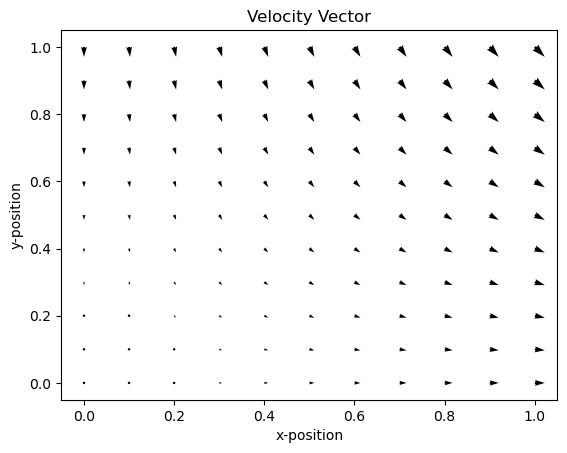

In [60]:
plt.title('Velocity Vector')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.quiver(X, Y, ux, uy, scale=50)
plt.show()

In [61]:
T = np.zeros((ny, nx, nt + 1))
T_guess = np.zeros((ny, nx))

In [62]:
# fixed boundary conditions
T[ny-1, :, :] = 1
for j in range(0, ny):
    T[j, 0, :] = (j * dy)**2

T[:, :, 0]

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.36, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.49, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.64, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.81, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

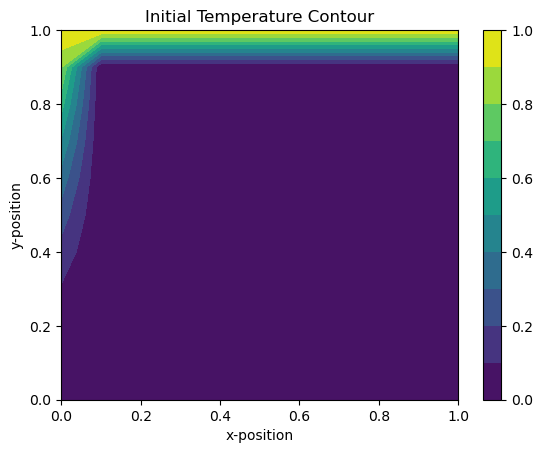

In [68]:
levels = np.linspace(0, 1, 11)

plt.title('Initial Temperature Contour')
plt.xlabel('x-position')
plt.ylabel('y-position')
contour = plt.contourf(X, Y, T[:, :, 0], levels=levels)
plt.colorbar()
plt.show()

In [73]:
n_iterations = 0
error_list = []

for k in range(0, nt):  # time loop
    error = 1
    T_guess[:, :] = T[:, :, k]
    while error > tolerance:
        for j in range(1, ny - 1):  # y loop
            for i in range(1, nx - 1):  # x loop
                T[j, i, k + 1] = (((((Dx + np.amax((-Fx * ux[j, i + 1], 0))) * T[j, i + 1, k + 1]) + 
                                    ((Dx + np.amax((Fx * ux[j, i - 1]))) * T[j, i - 1, k + 1]) +
                                  ((Dy + np.amax((-Fy * uy[j + 1, i], 0))) * T[j + 1, i, k + 1])) + 
                                  ((Dy + np.amax((Fy * uy[j - 1, i], 0))) * T[j - 1, i, k + 1]) + (((rhocp * dx * dy) / dt) * T[j, i, k])) /
                                  ((Dx + np.amax((-Fx * ux[j, i + 1], 0))) + (Dx + np.amax((Fx * ux[j, i - 1]))) + (Dy + np.amax((-Fy * uy[j + 1, i], 0))) + 
                                   (Dy + np.amax((Fy * uy[j - 1, i], 0))) + ((rhocp * dx * dx) / dt)))

        # fixed flux boundary conditions
        # zero flux boundary at the bottom (xy) of the system, there are can be no j - 1 terms, i + 1 and i - 1 stay, j + 1 replaced with 1
        for l in range(1, nx -1):
            T[0, l, k + 1] = (((((Dx + np.amax((-Fx * ux[0, l + 1], 0))) * T[0, l + 1, k + 1]) + ((Dx + np.amax((Fx * ux[0, l - 1]))) * T[0, l - 1, k + 1]) +
                                  ((Dy + np.amax((-Fy * uy[1, l], 0))) * T[1, l, k + 1])) + (((rhocp * dx * dx) / dt) * T[0, l, k])) /
                                  ((Dx + np.amax((-Fx * ux[0, l + 1], 0))) + (Dx + np.amax((Fx * ux[0, l - 1]))) + (Dy + np.amax((-Fy * uy[1, l], 0))) + ((rhocp * dx * dx) / dt)))

        # zero flux boundary condition on right (xy) of the system, there can be no (i + 1) terms, (j - 1) and (j + 1) stay, (i - 1) replaced with (nx - 2) j replaced with m
        for m in range(1, ny -1):
            T[m, nx - 1, k + 1] = (((((Dx + np.amax((Fx * ux[m, nx - 2]))) * T[m, nx - 2, k + 1]) +
                                  ((Dy + np.amax((-Fy * uy[m + 1, nx - 1], 0))) * T[m + 1, nx - 1, k + 1])) + 
                                  ((Dy + np.amax((Fy * uy[m - 1, nx - 1], 0))) * T[m - 1, nx - 1, k + 1]) + (((rhocp * dx * dx) / dt) * T[m, nx - 1, k])) /
                                  ((Dx + np.amax((Fx * ux[m, nx - 2]))) + (Dy + np.amax((-Fy * uy[m + 1, nx - 1], 0))) + 
                                   (Dy + np.amax((Fy * uy[m - 1, nx - 1], 0))) + ((rhocp * dx * dx) / dt)))
            
        #corner BC
        T[0, nx - 1, k + 1] = (((((Dx + np.amax((Fx * ux[0, nx - 2]))) * T[0, nx - 2, k + 1]) +
                                  ((Dy + np.amax((-Fy * uy[1, nx - 1], 0))) * T[1, nx - 1, k + 1])) + (((rhocp * dx * dx) / dt) * T[0, nx - 1, k])) /
                                  ((Dx + np.amax((Fx * ux[0, nx - 2]))) + (Dy + np.amax((-Fy * uy[1, nx - 1], 0))) + ((rhocp * dx * dx) / dt)))



        error = np.amax(np.amax(np.abs((T[:, :, k + 1] - T_guess))))
        error_list.append(error)
        n_iterations += 1
        T_guess[:, :] = T[:, :, k + 1]

In [74]:
steady_error = []
for k in range(0, nt):
    steady = np.amax(np.amax(np.abs(T[:, :, k + 1] - T[:, :, k])))
    steady_error.append(steady)

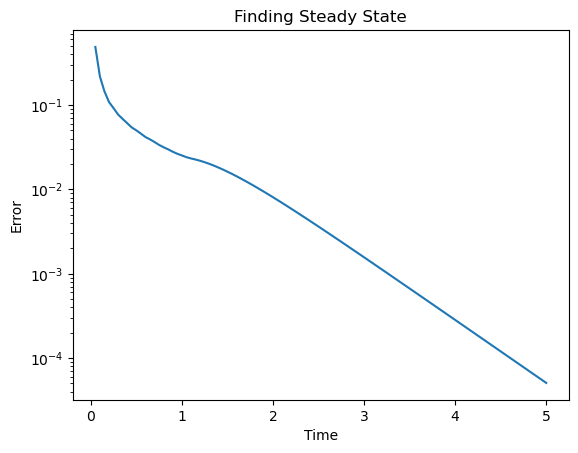

In [76]:
plt.title('Finding Steady State')
plt.xlabel('Time')
plt.ylabel('Error')
plt.yscale('log')
plt.plot(time[1:nt+1], steady_error)
plt.show()

0


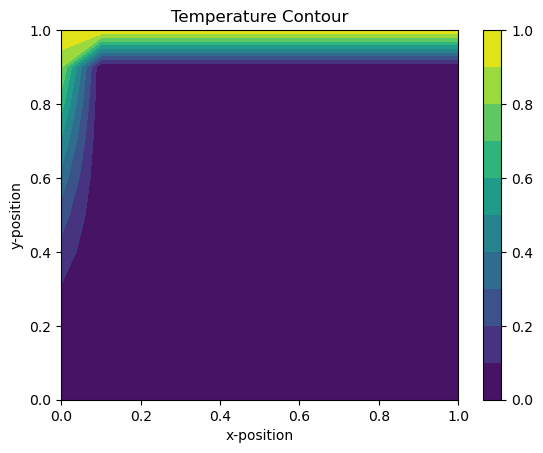

In [80]:
print_time = 0
print_time = int(print_time / dt)
print(print_time)

plt.title('Temperature Contour')
plt.xlabel('x-position')
plt.ylabel('y-position')
contour = plt.contourf(X, Y, T[:, :, print_time], levels=levels)
plt.colorbar()
plt.show()

In [ ]:
fig = plt.figure()
ax = plt.axes()

def init():
    contour = plt.contourf(X, Y, T[:, :, 0], levels=levels)
    plt.colorbar()
    plt.xlabel('x position')
    plt.ylabel('y position')
    return contour

def animate(i):
    contour = plt.contourf(X, Y, T[:, :, i])
    return contour

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nt, interval=500, blit=False)

anim.save('test_animation_1.mp4', fps=10)

plt.show()

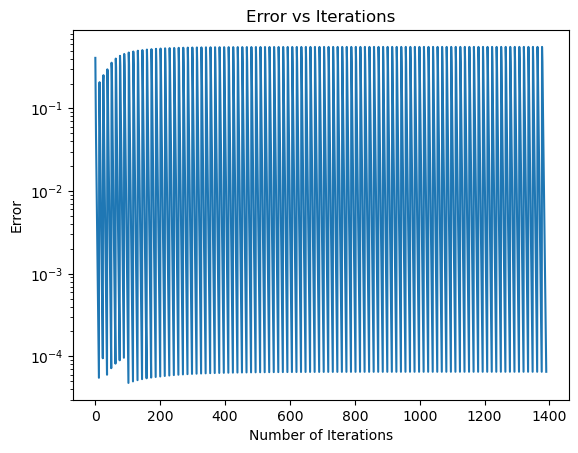

In [81]:
plt.title('Error vs Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.yscale('log')
plt.plot(range(0, n_iterations), error_list)
plt.show()